In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import os
import sys
from datetime import datetime


## 2.1
I tried several versions of the k medoid code provided below. Includeing different distance measures. The details are provided in the report. It seems redundant to keep the previous versions in the final code.

## 2.2
Below is the finalised k medoids function. To call the main k medoid function the main argument that need to be provided is the input path to the image. You can also specify number of clusters and an output path. For instance k_medoids(imp_path,K=15, out_path='out.png'). Here wI ran the code for 3 images at at varrying cluster sizes. In the report other iterations of K have been shown as well. 
Please ensure the input image is not very large or that K does not exceed 40 as it will be computationally too expensive.

In [2]:
# K medoid functions

def initialize_K_medoids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]


def find_closest_medoids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c


def compute_medoids(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    new = []
    #m = len(X)
    for k in range(K):
        #sample 10% of points in k cluster
        examples = X[np.where(idx == k)]
        sample_size = round(examples.shape[0]*0.10)
        ids = np.random.choice(examples.shape[0], size = sample_size, replace = False)
        sub_cluster = examples[ids]
        
        dist_point = []
        
        for i in sub_cluster:
            dist = np.sum(np.linalg.norm(sub_cluster - i, axis = 1))
            dist_point.append(dist)
            
            
        min_id = np.argmin(dist_point)
        #new.append(sub_cluster[min_id])
        centroids[k] = sub_cluster[min_id]
    return centroids

def find_k_medoids(X, K, max_iters=20):
    centroids = initialize_K_medoids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_medoids(X, centroids)
        centroids = compute_medoids(X, idx, K)
        if (previous_centroids==centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx



def k_medoids(imp_path,K=15, out_path='out.png'):
    # Load the image

    image = io.imread(imp_path) 
    image =  np.asarray(image) / 255

    w, h, d = image.shape
    #print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))
    
    # Get the feature matrix X
    X = image.reshape((w * h, d))
    #K = 15 # the number of colors in the image
    m = len(X)
    
    # Get colors
    
    colors, _ = find_k_medoids(X, K, max_iters=20)

    # Indexes for color for each pixel
    idx = find_closest_medoids(X, colors)
    #print(idx)
    # Reconstruct the image
    idx = np.array(idx, dtype=np.uint8)
    X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
    #compressed_image = Image.fromarray(X_reconstructed)
    plt.imshow(X_reconstructed) 
    plt.show() 
    # Save reconstructed image to disk
    io.imsave(out_path, X_reconstructed)
    #compressed_image.save('out.png')



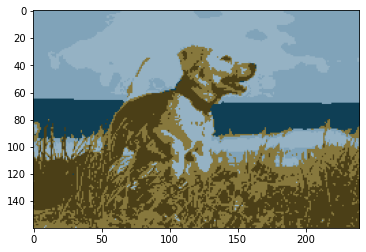

Duration: 0:00:08.673812


In [3]:
start_time = datetime.now()
k_medoids('dog.jpg', K=5, out_path='dog_k5_10.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

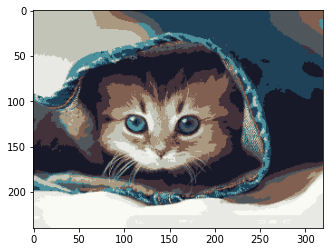

Duration: 0:00:18.382861


In [4]:

start_time = datetime.now()
k_medoids('catttt.jpg', K=10, out_path='cat_k10.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

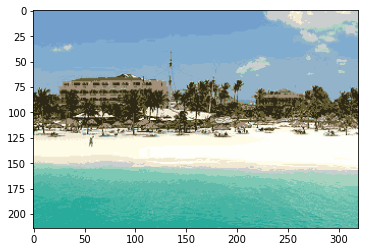

Duration: 0:00:14.948534


In [5]:
start_time = datetime.now()
k_medoids('beach.bmp', K=15, out_path='beach_k15.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

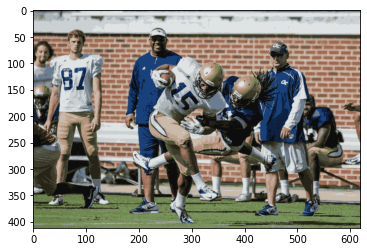

Duration: 0:01:08.085007


In [6]:
start_time = datetime.now()
k_medoids('football.bmp', K=20, out_path='football_k20.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## 2.3 
The change in initialisation in implemented after the K means function of 2.4. Please scroll down below for 2.3.

## 2.4
The K means immplementation is identical to K medoids but for the cluster center instead of a point in the cluster is the mean as we are using L2 norm. Similar to K medoids I have shown a few examples below with varying values of K. I have not shown all the ouputs provided in the report as it made the code too cluttered. 

In [7]:
def initialize(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]


def find_centers(X, centroids):
    m = len(X)
    c = np.zeros(m)
    
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c


def means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids


def find_k_means(X, K, max_iters=20):
    centroids = initialize(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_centers(X, centroids)
        centroids = means(X, idx, K)
        if (previous_centroids==centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx



def k_means(imp_path,K=15, out_path ='k_mean_out.png'):
    # Load the image
    # K the number of colors in the image
    image = io.imread(imp_path) 
    image =  np.asarray(image) / 255

    w, h, d = image.shape
    #print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

    # Get the feature matrix X
    X = image.reshape((w * h, d))

    # Get colors
    #print('Runnign K-means')
    colors, _ = find_k_means(X, K, max_iters=20)

    # Indexes for color for each pixel
    idx = find_centers(X, colors)

    # Reconstruct the image
    idx = np.array(idx, dtype=np.uint8)
    X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
    #compressed_image = Image.fromarray(X_reconstructed)
    plt.imshow(X_reconstructed) 
    plt.show() 
    # Save reconstructed image to disk
    io.imsave(out_path, X_reconstructed)
    #compressed_image.save('out.png')

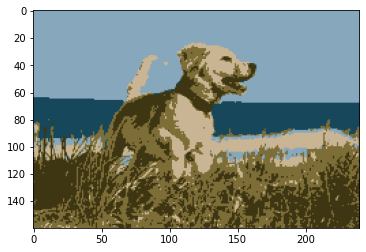

Duration: 0:00:06.598872


In [8]:
start_time = datetime.now()
k_means('dog.jpg', K=5, out_path='dog_k5_kmeans.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

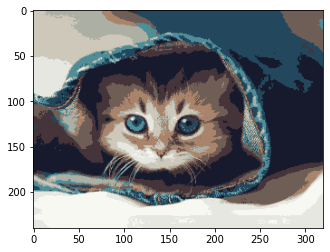

Duration: 0:00:12.958406


In [9]:
start_time = datetime.now()
k_means('catttt.jpg', K=10, out_path='cat_k10_kmeans.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

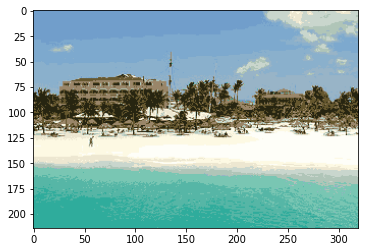

Duration: 0:00:11.867309


In [10]:
start_time = datetime.now()
k_means('beach.bmp', K=15, out_path='beach_k15_kmeans.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

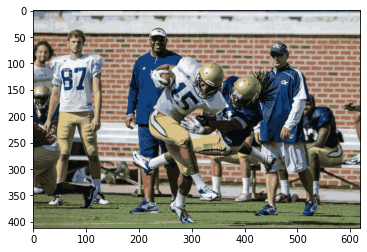

Duration: 0:00:44.415247


In [11]:
start_time = datetime.now()
k_means('football.bmp', K=20, out_path='football_k20_kmeans.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### Please run all k medoid and k means examples above this point as the initialization is changed below for 2.3

## 2.3
Ran the k medoid implementation by changing the initialization from random to a specific k points. I only used k = 5 so I only needed to specify 5 points. This is done by changing the innitialisation function. 

In [12]:
# Changing the innitialisation function to set first k points
def initialize_K_centroids_medoids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    #print(m)
    row_idx= np.array(range(0, 5))
    #return X[np.random.choice(m, K, replace=False), :]
    #row_idx= list(range(1, K))
    return X[np.array([0,10,20,30,40]), :]

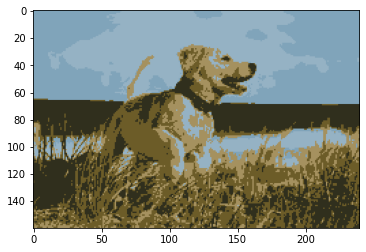

Duration: 0:00:09.410847


In [13]:
# do your work here
start_time = datetime.now()
k_medoids('dog.jpg', K=5, out_path='bad_dog_10.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## 2.4
Change initialization for k means to 5 bad points

In [14]:
def initialize(X, K):
    """ Choose K points from X at random """
    return X[np.array([0,10,20,30,40]), :]

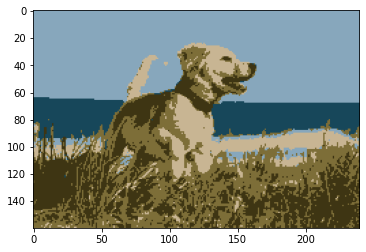

Duration: 0:00:06.434318


In [15]:
start_time = datetime.now()
k_means('dog.jpg', K=5, out_path='bad_dog_k5_means.png')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))